In [157]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import os
import glob
from hilbertcurve.hilbertcurve import HilbertCurve
from skimage.metrics import mean_squared_error
from skimage import io
from skimage.metrics import structural_similarity as ssim

In [184]:
image_list = []
for filename in glob.glob('/home/gamoba/Projects/Estadistica/TEST/*.png'):
    im=Image.open(filename)
    image_list.append(im)

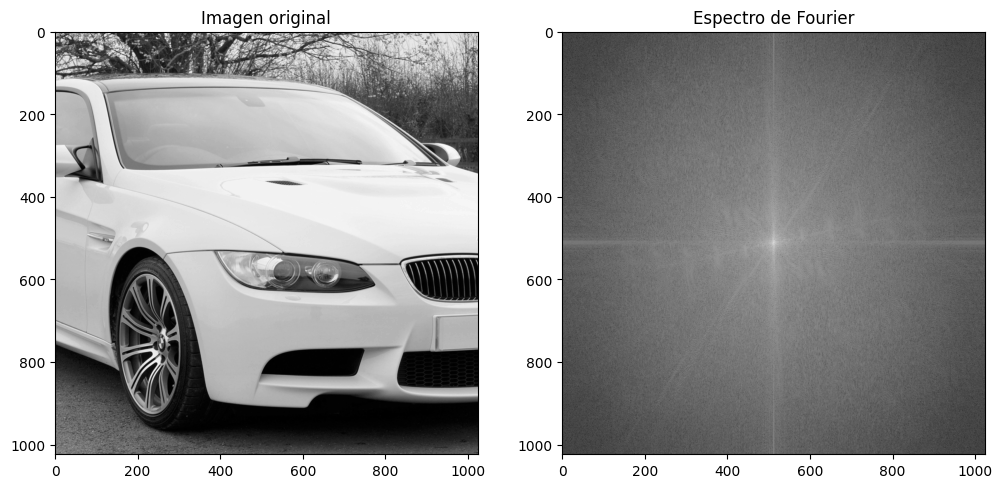

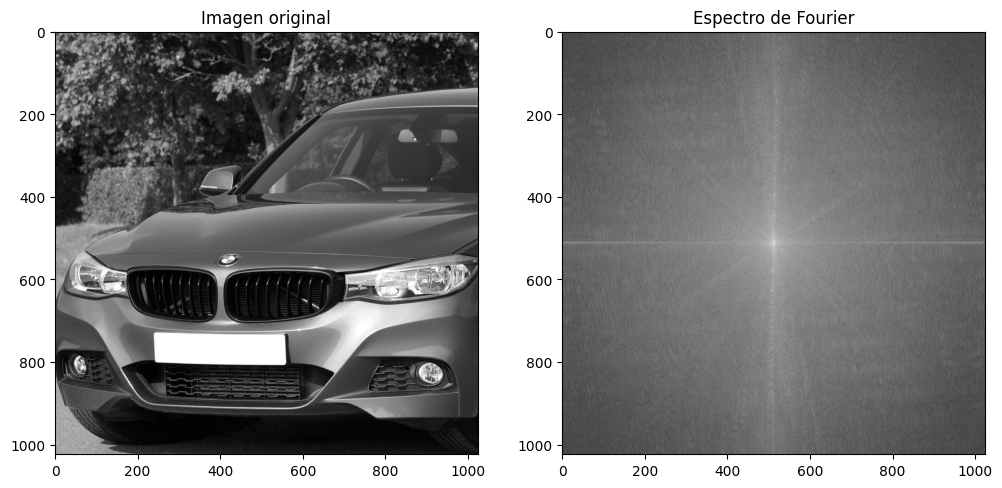

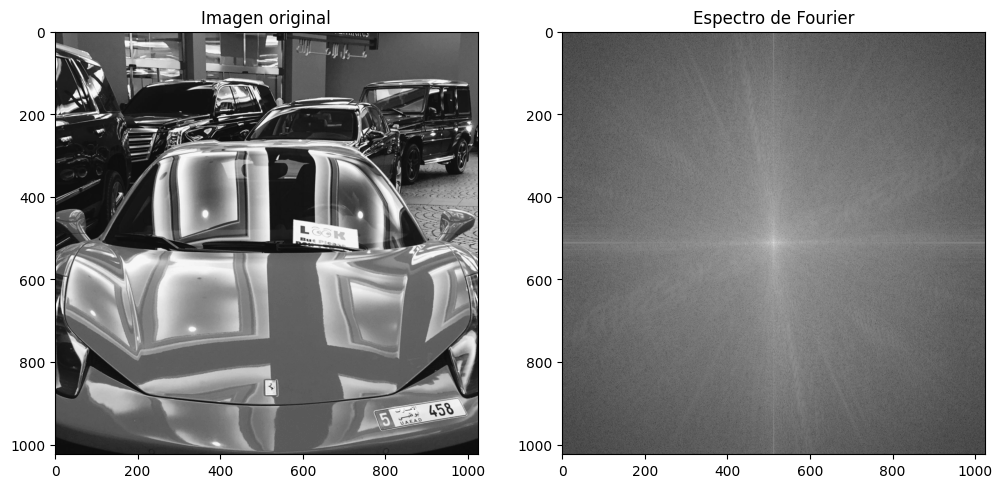

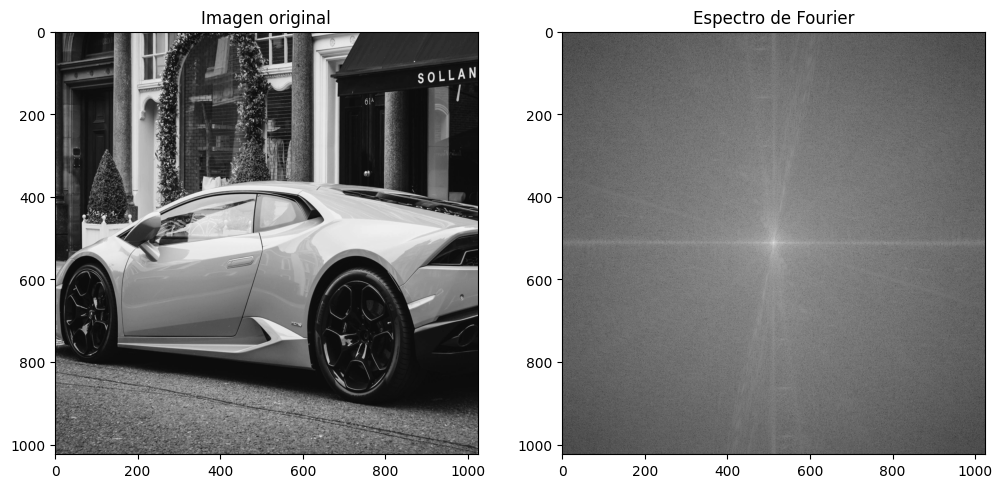

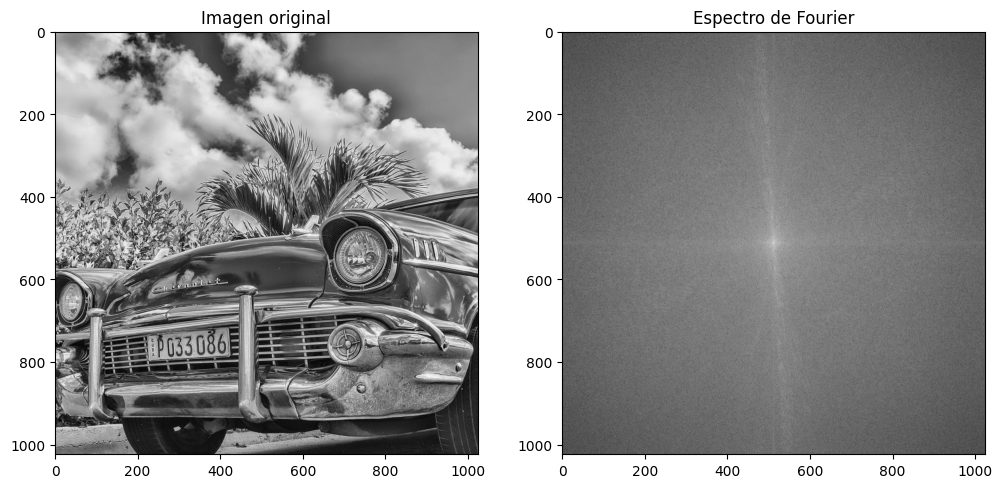

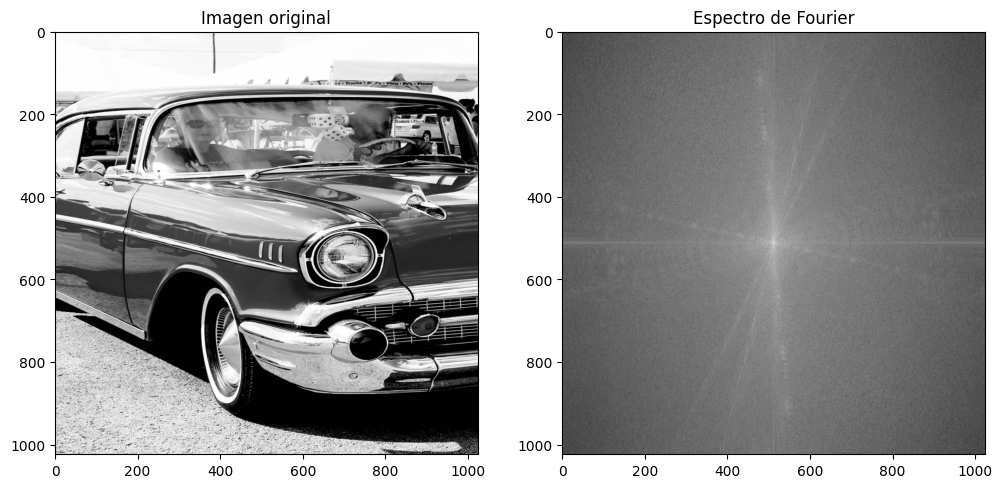

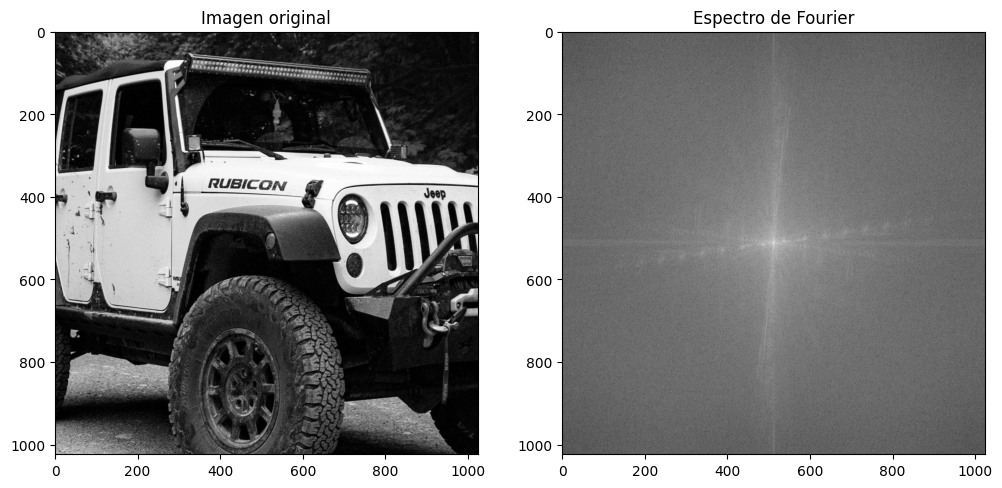

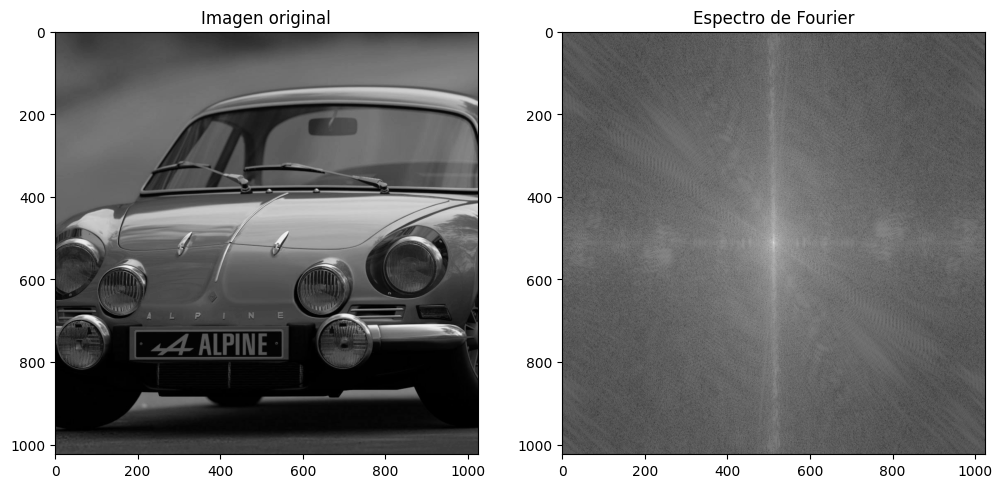

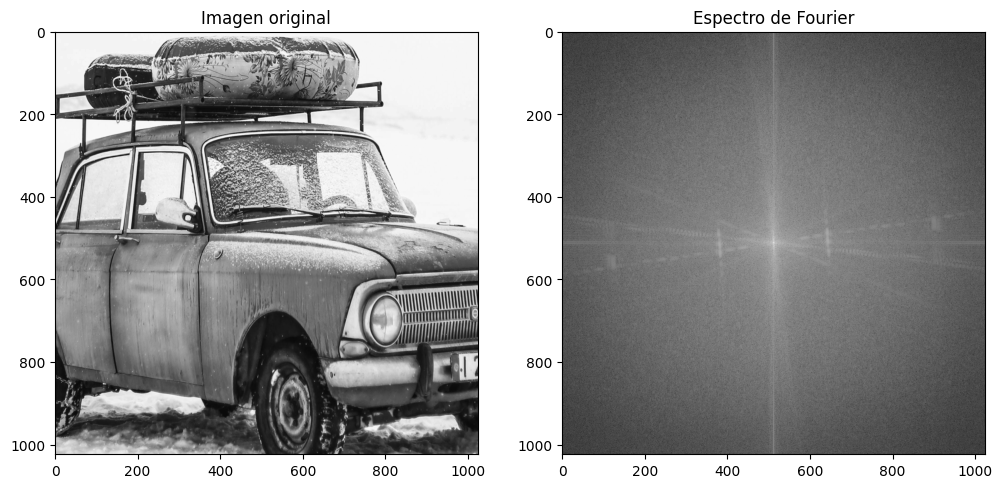

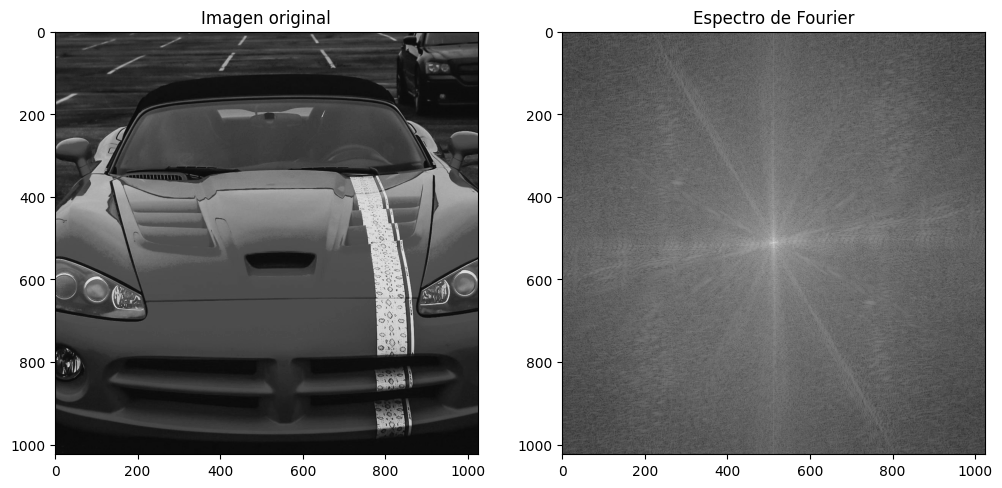

In [185]:
for i in range(len(image_list)):
    img_np = np.array(image_list[i])
    if img_np.ndim == 3:
        img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2GRAY)
    f=np.fft.fft2(img_np)
    fshift = np.fft.fftshift(f)
    fase_espectro = np.angle(fshift)
    magnitud = np.abs(fshift)
    arreglo_magnitudes = magnitud 
    arreglo_fases = fase_espectro 
    np.save('FASES/fases_carro'+str(i)+'.npy', arreglo_fases)
    np.save('MAGNITUDES/magnitudes_carro'+str(i)+'.npy', arreglo_magnitudes)


    magnitud_espectro = 20 * np.log(np.abs(fshift) + 1)
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(img_np, cmap='gray')
    plt.title('Imagen original')

    plt.subplot(1, 2, 2)
    plt.imshow(magnitud_espectro, cmap='gray')
    plt.title('Espectro de Fourier')

    plt.imsave('CARROS_BW/carrobw'+str(i)+'.png', img_np, cmap='gray')
    plt.imsave('ESPECTROS/Espectro_Fases'+str(i)+'.png', magnitud_espectro, cmap='gray')




In [160]:
"""
lista_fases = []
for filename in sorted(glob.glob('/home/gamoba/Projects/Estadistica/FASES/*.npy')):
    fs = np.load(filename)
    lista_fases.append(fs)

for n in range(len(lista_fases)):
    largo_de_las_filas = len(lista_fases[n][0])
    largo_de_las_columnas = len(lista_fases[n])
    lista_fases[n] = lista_fases[n].flatten().tolist()
    num_elements = int(0.1 * len(lista_fases[n]))
    lista_fases[n][:num_elements] = [0]*num_elements
    lista_fases[n] = np.array(lista_fases[n]).reshape(largo_de_las_columnas, largo_de_las_filas)
    np.save('FASES/fases_carro'+str(n)+'.npy', lista_fases[n])
"""

"\nlista_fases = []\nfor filename in sorted(glob.glob('/home/gamoba/Projects/Estadistica/FASES/*.npy')):\n    fs = np.load(filename)\n    lista_fases.append(fs)\n\nfor n in range(len(lista_fases)):\n    largo_de_las_filas = len(lista_fases[n][0])\n    largo_de_las_columnas = len(lista_fases[n])\n    lista_fases[n] = lista_fases[n].flatten().tolist()\n    num_elements = int(0.1 * len(lista_fases[n]))\n    lista_fases[n][:num_elements] = [0]*num_elements\n    lista_fases[n] = np.array(lista_fases[n]).reshape(largo_de_las_columnas, largo_de_las_filas)\n    np.save('FASES/fases_carro'+str(n)+'.npy', lista_fases[n])\n"

![hilbert](imgs/hilbert.png)

In [200]:
hilbert_curve = HilbertCurve(10, 2)
fases = np.load('FASES/fases_carro0.npy')
hilbert_ordered_values = [fases[x, y] for i in range(fases.size) for x, y in [hilbert_curve.point_from_distance(i)]]
num_elements = int(0.1 * len(hilbert_ordered_values))
print(num_elements)
hilbert_ordered_values[:num_elements] = [0]*num_elements
hilbert_ordered_values[len(hilbert_ordered_values)-num_elements:len(hilbert_ordered_values)] = [0]*(len(hilbert_ordered_values)-(len(hilbert_ordered_values)-num_elements))
#hilbert_ordered_values[471860:576716] = [0]*(576716-471860)
print(hilbert_ordered_values[943714:943724])
reconstructed_array = np.zeros(fases.shape, dtype=fases.dtype)
for i in range(fases.size):
    x, y = hilbert_curve.point_from_distance(i)  
    reconstructed_array[x, y] = hilbert_ordered_values[i]  
np.save('FASES_RECORTADAS/fases_carro'+'0'+'.npy', reconstructed_array)


104857
[np.float64(-2.244922994210482), np.float64(-1.9669420484452393), np.float64(-1.3638196092270525), np.float64(0.5706480418523731), np.float64(0.20623667483333594), 0, 0, 0, 0, 0]


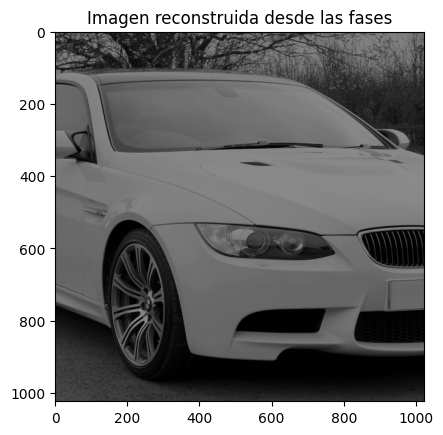

In [201]:
fases = np.load('FASES_RECORTADAS/fases_carro0.npy')
#fases = np.load('FASES/fases_carro0.npy')
magnitudes = np.load('MAGNITUDES/magnitudes_carro0.npy')


"""
fases_lista = fases.flatten().tolist()
x = range(len(fases_lista))
plt.plot(x,fases_lista,marker='o')
plt.title("fases")
plt.show()
"""
reconstructed_fshift = magnitudes * np.exp(1j * fases)
f_ishift = np.fft.ifftshift(reconstructed_fshift)
imagen_reconstruida = np.fft.ifft2(f_ishift)
imagen_reconstruida = np.abs(imagen_reconstruida)
plt.imshow(imagen_reconstruida, cmap='gray')
plt.title('Imagen reconstruida desde las fases')
plt.imsave('IMG_RECONSTRUIDAS/carro0.png', imagen_reconstruida, cmap='gray')
plt.show()


In [202]:

def comparar_imagenes(img1_path, img2_path):
    # Cargar las imágenes en escala de grises
    img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

    # Verificar si ambas imágenes se cargaron correctamente
    if img1 is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen: {img1_path}")
    if img2 is None:
        raise FileNotFoundError(f"No se pudo cargar la imagen: {img2_path}")

    # Verificar que las dimensiones sean las mismas
    if img1.shape != img2.shape:
        raise ValueError("Las imágenes deben tener las mismas dimensiones")

    # Calcular el Error Cuadrático Medio (MSE)
    mse = np.mean((img1 - img2) ** 2)

    # Calcular el Índice de Similitud Estructural (SSIM)
    ssim_index = ssim(img1, img2)

    return mse, ssim_index

# Ejemplo de uso
img1_path = 'CARROS_BW/carrobw0.png'
img2_path = 'IMG_RECONSTRUIDAS/carro0.png'
try:
    mse, ssim_index = comparar_imagenes(img1_path, img2_path)
    print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
    print(f"Índice de Similitud Estructural (SSIM): {ssim_index:.2f}")  
except FileNotFoundError as e:
    print(e)


Error Cuadrático Medio (MSE): 108.41
Índice de Similitud Estructural (SSIM): 0.80


| porcentaje | indice de similitud estructural | posicion |
|----------|----------|----------|
| 10%      | 0.99     | principio |
| 12%      | 0.88     | principio |
| 15% | 0.5 | principio |
| 20% | 0.17 | principio |
